In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

import re
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
url="https://www.flipkart.com/search?q=smartphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [3]:
page= requests.get(url)

In [4]:
page.status_code

200

In [5]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" si

In [6]:
pagecontent=page.text

In [7]:
pagecontent

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" siz

In [8]:
soup =BeautifulSoup(pagecontent)
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72

In [9]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57

In [10]:

#so we have to find div class for every category of smartphones to webscarp the data

In [12]:
product_name =[]
price =[]
rating =[]
features =[]
discount=[]
pagenum =[]


for i in range(1,31):
    url= "https://www.flipkart.com/search?q=smartphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off{}".format(i)
    page= requests.get(url)
    pagecontent= page.text
    soup= BeautifulSoup(pagecontent)
    


    for x in soup.find_all('div',attrs={'class':'_3pLy-c row'}):
        pname= x.find('div',attrs={'class':'_4rR01T'})
        cost=  x.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
        rat=   x.find('div',attrs={'class':'_3LWZlK'})
        spec=  x.find('div',attrs={'class':'fMghEO'})
        dis=   x.find('div',attrs={'class':'_3Ay6Sb'})
        
        
        if pname is None:
            product_name.append(np.NaN)
            
        else:
            product_name.append(pname.text)
            
        if cost is None:
            price.append(np.NaN)
            
        else:
            price.append(cost.text)
            
            
        if rat is None:
            rating.append(np.NaN)
            
        else:
            rating.append(rat.text)
            
            
        if spec is None:
            features.append(np.NaN)
            
        else:
            features.append(spec.text)
            
        if dis is None:
            discount.append(np.NaN)
            
        else:
            discount.append(dis.text)
            
            
        pagenum.append(i)
            
        
    
    

In [13]:
for l in [product_name, price, rating, features,discount,pagenum]:
    print(len(l))

720
720
720
720
720
720


In [15]:
smartphones_df= pd.DataFrame({'ProductName':product_name, 'Price':price, 'Rating':rating, 'Features':features,'Discount':discount,'PageNo':pagenum})

In [16]:
smartphones_df

,ProductName,Price,Rating,Features,Discount,PageNo
0,"realme 12 Pro+ 5G (Submarine Blue, 256 GB)","₹33,999",NaN,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,10% off,1
1,"realme 12 Pro 5G (Submarine Blue, 256 GB)","₹26,999",NaN,8 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full ...,15% off,1
2,"Motorola G34 5G (Ice Blue, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1
3,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1
4,"Motorola G34 5G (Charcoal Black, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1
...,...,...,...,...,...,...
715,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,30
716,"Motorola g54 5G (Midnight Blue, 128 GB)","₹13,999",4.2,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,22% off,30
717,"Motorola g54 5G (Pearl Blue, 128 GB)","₹13,999",4.2,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,22% off,30
718,"Apple iPhone 14 (Purple, 128 GB)","₹58,999",4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,15% off,30


In [17]:
smartphones_df["Features"][0]

'12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full HD+ Display50MP + 8MP + 64MP | 32MP Front Camera5000 mAh BatterySnapdragon 7s Gen 2 Processor1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for Inbox Accessories'

In [18]:
storage_regex= "^\[0-9] GB RAM|[0-9]* GB ROM+"
re.findall(storage_regex,smartphones_df["Features"][0])


['256 GB ROM']

In [19]:
" ".join(re.findall(storage_regex,smartphones_df["Features"][0]))

'256 GB ROM'

In [20]:
smartphones_df["ROM"]= smartphones_df["Features"].apply(lambda x:" ".join(re.findall(storage_regex,x)))

In [21]:
smartphones_df

,ProductName,Price,Rating,Features,Discount,PageNo,ROM
0,"realme 12 Pro+ 5G (Submarine Blue, 256 GB)","₹33,999",NaN,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,10% off,1,256 GB ROM
1,"realme 12 Pro 5G (Submarine Blue, 256 GB)","₹26,999",NaN,8 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full ...,15% off,1,256 GB ROM
2,"Motorola G34 5G (Ice Blue, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM
3,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM
4,"Motorola G34 5G (Charcoal Black, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM
...,...,...,...,...,...,...,...
715,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,30,128 GB ROM
716,"Motorola g54 5G (Midnight Blue, 128 GB)","₹13,999",4.2,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,22% off,30,128 GB ROM
717,"Motorola g54 5G (Pearl Blue, 128 GB)","₹13,999",4.2,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,22% off,30,128 GB ROM
718,"Apple iPhone 14 (Purple, 128 GB)","₹58,999",4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,15% off,30,128 GB ROM


In [22]:
smartphones_df["Brand"] =smartphones_df["ProductName"].apply(lambda x: " ".join(re.findall("^\w+",x)))
smartphones_df

,ProductName,Price,Rating,Features,Discount,PageNo,ROM,Brand
0,"realme 12 Pro+ 5G (Submarine Blue, 256 GB)","₹33,999",NaN,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,10% off,1,256 GB ROM,realme
1,"realme 12 Pro 5G (Submarine Blue, 256 GB)","₹26,999",NaN,8 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full ...,15% off,1,256 GB ROM,realme
2,"Motorola G34 5G (Ice Blue, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM,Motorola
3,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM,Motorola
4,"Motorola G34 5G (Charcoal Black, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM,Motorola
...,...,...,...,...,...,...,...,...
715,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,30,128 GB ROM,Motorola
716,"Motorola g54 5G (Midnight Blue, 128 GB)","₹13,999",4.2,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,22% off,30,128 GB ROM,Motorola
717,"Motorola g54 5G (Pearl Blue, 128 GB)","₹13,999",4.2,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,22% off,30,128 GB ROM,Motorola
718,"Apple iPhone 14 (Purple, 128 GB)","₹58,999",4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,15% off,30,128 GB ROM,Apple


In [23]:
smartphones_df["Price"]=smartphones_df["Price"].apply(lambda x: str(x).replace('₹','').replace(',','')).astype(float)

In [24]:
smartphones_df

,ProductName,Price,Rating,Features,Discount,PageNo,ROM,Brand
0,"realme 12 Pro+ 5G (Submarine Blue, 256 GB)",33999.0,NaN,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,10% off,1,256 GB ROM,realme
1,"realme 12 Pro 5G (Submarine Blue, 256 GB)",26999.0,NaN,8 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full ...,15% off,1,256 GB ROM,realme
2,"Motorola G34 5G (Ice Blue, 128 GB)",11999.0,4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM,Motorola
3,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM,Motorola
4,"Motorola G34 5G (Charcoal Black, 128 GB)",11999.0,4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,1,128 GB ROM,Motorola
...,...,...,...,...,...,...,...,...
715,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,20% off,30,128 GB ROM,Motorola
716,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,22% off,30,128 GB ROM,Motorola
717,"Motorola g54 5G (Pearl Blue, 128 GB)",13999.0,4.2,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,22% off,30,128 GB ROM,Motorola
718,"Apple iPhone 14 (Purple, 128 GB)",58999.0,4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,15% off,30,128 GB ROM,Apple


DATA VISUALIZATION

<Figure size 1300x500 with 0 Axes>

<Axes: xlabel='Brand', ylabel='Price'>

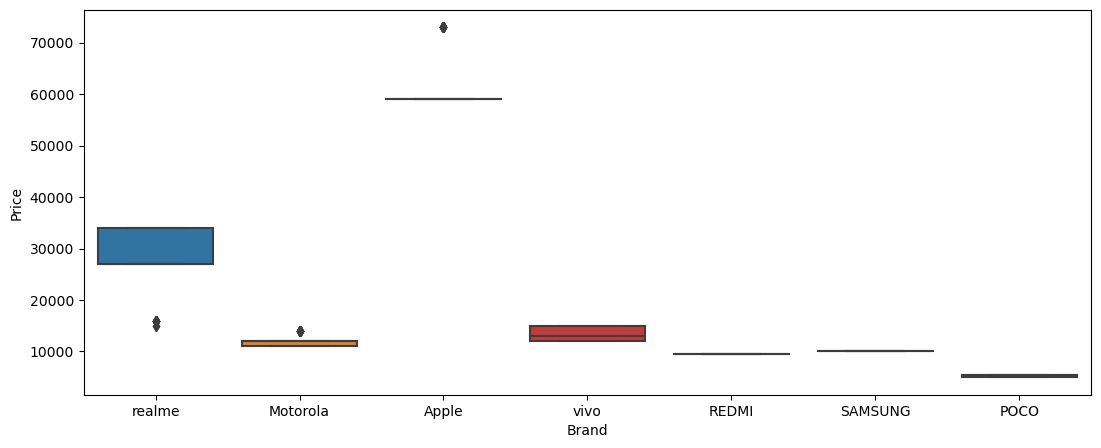

In [25]:
plt.figure(figsize=(13,5))
sns.boxplot(data=smartphones_df,x=smartphones_df["Brand"],y=smartphones_df["Price"])

<Figure size 1300x500 with 0 Axes>

<Axes: xlabel='Price', ylabel='Count'>

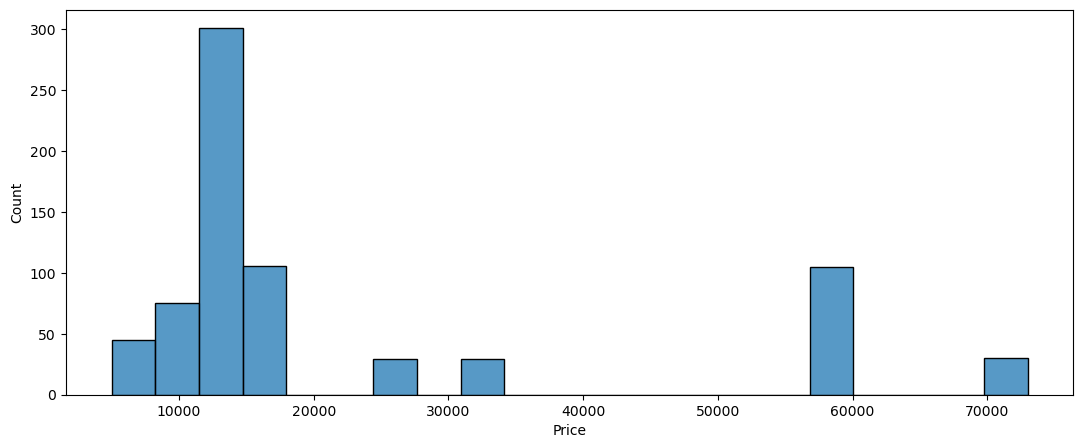

In [26]:
plt.figure(figsize=(13,5))
sns.histplot(smartphones_df.Price)

<Axes: xlabel='Brand', ylabel='count'>

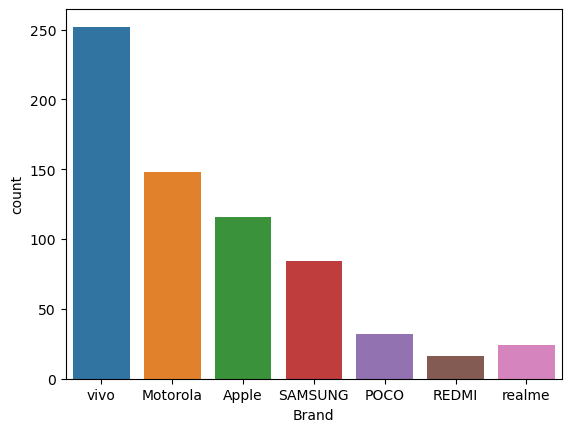

In [27]:
sns.countplot(smartphones_df, x="Brand")

<Axes: xlabel='Brand', ylabel='Count'>

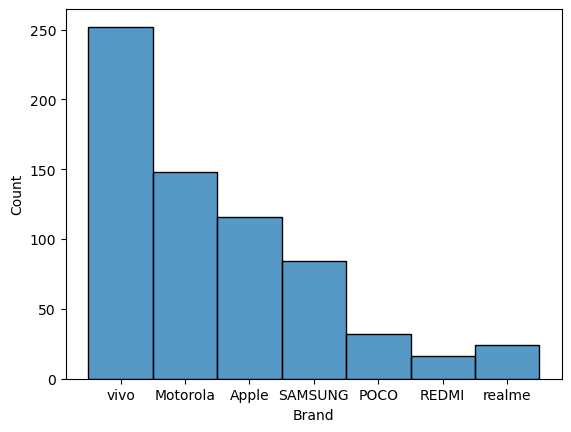

In [28]:
sns.histplot(smartphones_df, x="Brand")

<Axes: xlabel='Rating', ylabel='Count'>

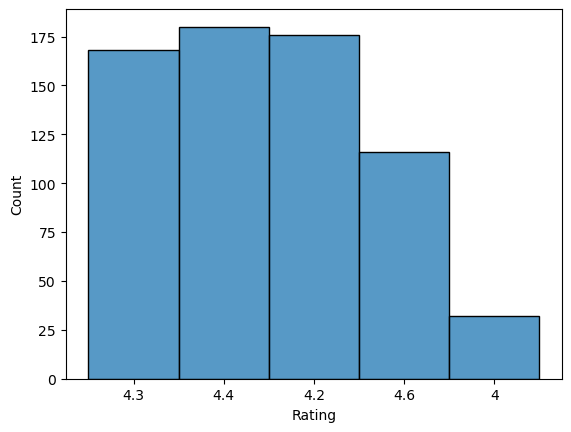

In [30]:
sns.histplot(smartphones_df, x="Rating")

<Figure size 1300x500 with 0 Axes>

<Axes: xlabel='Brand', ylabel='Price'>

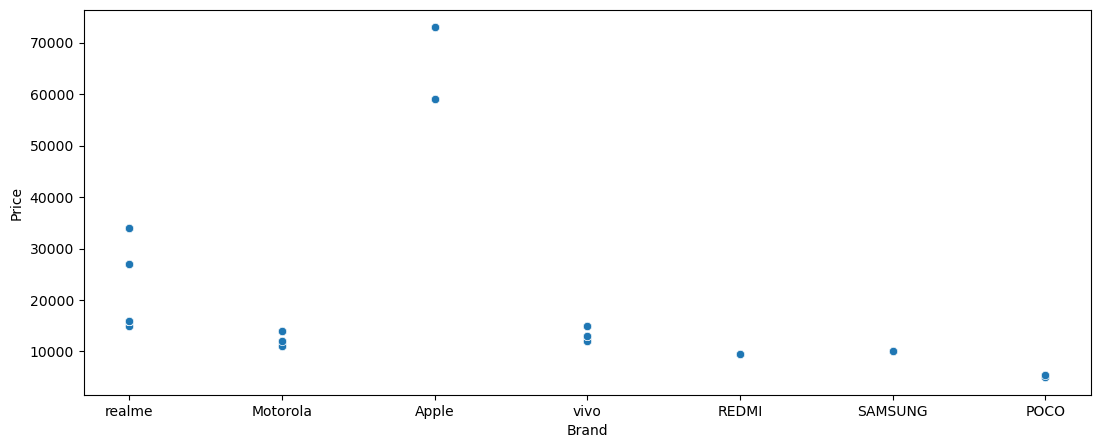

In [27]:
plt.figure(figsize=(13,5))
sns.scatterplot(data=smartphones_df,x=smartphones_df["Brand"],y=smartphones_df["Price"])